<a href="https://colab.research.google.com/github/Tranvanhien141625/BDS/blob/main/Randomforest_HN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount( '/content/gdrive' )


Mounted at /content/gdrive


In [ ]:
!pip install pyspark==3.0.1 py4j==0.10.9


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 28.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612225 sha256=1d9c37ddd275e552ea8914b2f0d27e053ec9e410587cdd142ebf85a4b31fcb0a
  Stored in directory: /root/.cache/pip/wheels/19/b0/c8/6cb894117070e130fc44352c2a13f15b6c27e440d04a84fb48
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('train').getOrCreate()


In [ ]:
#data  =  spark.read.csv('/content/gdrive/MyDrive/VN_housing_dataset.csv', sep= ',',header=True ,inferSchema = True)


In [ ]:
#data.head(3)

In [ ]:
#data.printSchema()

In [ ]:
#data.show()


In [ ]:
import tensorflow as tf
!pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 36.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.14.0
TensorFlow Decision Forests v1.7.0


In [ ]:
train_file_path = "/content/gdrive/MyDrive/VN_housing_dataset.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (82497, 13)


In [ ]:
dataset_df

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82492,82492.0,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,50 m²,NaN,NaN,292 triệu/m²
82493,82493.0,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4 phòng,41 m²,NaN,NaN,"341,46 triệu/m²"
82494,82494.0,2019-08-05,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,NaN,4 phòng,60 m²,NaN,NaN,"101,67 triệu/m²"
82495,82495.0,2019-08-05,"Đường Hồ Tùng Mậu, Phường Mai Dịch, Quận Cầu G...",Quận Cầu Giấy,Phường Mai Dịch,Nhà phố liền kề,NaN,NaN,4 phòng,45 m²,NaN,NaN,"102,22 triệu/m²"


In [ ]:
dataset_df = dataset_df.drop('Unnamed: 0', axis=1)
dataset_df.head(100)

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-08-04,"Đường Hoàng Mai, Phường Hoàng Văn Thụ, Quận Ho...",Quận Hoàng Mai,Phường Hoàng Văn Thụ,"Nhà mặt phố, mặt tiền",Đã có sổ,5,3 phòng,30 m²,4 m,7.55 m,"118,33 triệu/m²"
96,2020-08-04,"Văn Phú, Phường La Khê, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường La Khê,"Nhà ngõ, hẻm",Đã có sổ,3,2 phòng,37 m²,10 m,3.7 m,"53,51 triệu/m²"
97,2020-08-04,"Tây Sơn, Phường Ngã Tư Sở, Quận Đống Đa, Hà Nội",Quận Đống Đa,Phường Ngã Tư Sở,"Nhà ngõ, hẻm",Đã có sổ,NaN,3 phòng,76 m²,NaN,NaN,"61,18 triệu/m²"
98,2020-08-04,"Đường Phùng Khoang, Phường Trung Văn, Quận Nam...",Quận Nam Từ Liêm,Phường Trung Văn,"Nhà ngõ, hẻm",Đã có sổ,1,1 phòng,45 m²,10 m,4.5 m,"71,11 triệu/m²"




```
# Định dạng của đoạn này là mã`
```

Xóa ký tự toán học và chú thích sau số.

In [ ]:
#for index, value in dataset_df['Giá/m2'].items():
#    try:
#        converted_value = float(value)
#    except ValueError:
#        print(f"Lỗi chuyển đổi kiểu dữ liệu tại dòng {index}: {value}")


In [ ]:
dataset_df=dataset_df.drop(52317, axis=0, inplace=False)
dataset_df=dataset_df.drop(55653, axis=0, inplace=False)
dataset_df=dataset_df.drop(58003, axis=0, inplace=False)
dataset_df=dataset_df.drop(63, axis=0, inplace=False)



In [ ]:

dataset_df['Giá/m2'] = dataset_df['Giá/m2'].replace(to_replace=',', value='.', regex=True)
dataset_df['Giá/m2'] = dataset_df['Giá/m2'].replace('[^\d.]', '', regex=True).astype(float)

dataset_df['Dài'] = dataset_df['Dài'].replace('[^\d.]', '', regex=True)
dataset_df['Dài'] = dataset_df['Dài'].replace('[^\d.]', '', regex=True).astype(float)

dataset_df['Rộng'] = dataset_df['Rộng'].replace('[^\d.]', '', regex=True)
dataset_df['Rộng'] = dataset_df['Rộng'].replace('[^\d.]', '', regex=True).astype(float)

dataset_df['Số phòng ngủ'] = dataset_df['Số phòng ngủ'].replace('[^\d.]', '', regex=True)
dataset_df['Số phòng ngủ'] = dataset_df['Số phòng ngủ'].replace('[^\d.]', '', regex=True).astype(float)

dataset_df['Diện tích'] = dataset_df['Diện tích'].replace('[^\d.]', '', regex=True)
dataset_df['Diện tích'] = dataset_df['Diện tích'].replace('[^\d.]', '', regex=True).astype(float)



dataset_df = dataset_df.rename(columns={'Địa chỉ': 'Dia_chi'})
dataset_df = dataset_df.rename(columns={'Loại hình nhà ở': 'Loai_nha'})
dataset_df = dataset_df.rename(columns={'Giấy tờ pháp lý': 'Giay_to'})
dataset_df = dataset_df.rename(columns={'Số tầng': 'So_tang'})
dataset_df = dataset_df.rename(columns={'Số phòng ngủ': 'So_phong'})
dataset_df = dataset_df.rename(columns={'Diện tích': 'Dien_tich'})





In [ ]:
dataset_df=dataset_df.dropna()
dataset_df = dataset_df.drop(["Ngày"], axis=1)

In [ ]:
dataset_df.head()

,Dia_chi,Quận,Huyện,Loai_nha,Giay_to,So_tang,So_phong,Dien_tich,Dài,Rộng,Giá/m2
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4.0,40.0,10.0,4.0,65.00
15,"Đường Bồ Đề, Phường Bồ Đề, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Bồ Đề,"Nhà ngõ, hẻm",Đã có sổ,5,4.0,52.0,12.0,4.2,93.27
24,"Đường Tố Hữu, Phường La Khê, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường La Khê,"Nhà mặt phố, mặt tiền",Đã có sổ,5,5.0,90.0,18.0,5.0,108.89
29,"180/61/5, Đường Tây Mỗ, Phường Tây Mỗ, Quận Na...",Quận Nam Từ Liêm,Phường Tây Mỗ,"Nhà ngõ, hẻm",Đã có sổ,4,3.0,32.0,6.6,4.5,60.94
34,"Đường Tả Thanh Oai, Xã Tả Thanh Oai, Huyện Tha...",Huyện Thanh Trì,Xã Tả Thanh Oai,"Nhà ngõ, hẻm",Đã có sổ,3,2.0,42.0,11.0,4.0,29.76


In [ ]:
dataset_df.describe()


,So_phong,Dien_tich,Dài,Rộng,Giá/m2
count,11470.000000,11470.000000,11470.000000,11470.000000,11470.000000
mean,3.955362,55.044595,45.432526,17.643010,105.782581
std,1.535840,451.667768,1226.540871,200.217805,72.164563
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,34.000000,8.000000,3.800000,71.050000
50%,4.000000,40.000000,10.000000,4.000000,90.000000
75%,4.000000,52.000000,12.000000,5.000000,116.000000
max,10.000000,40000.000000,120000.000000,5500.000000,950.000000


In [ ]:
dataset_df.head(10)


,Dia_chi,Quận,Huyện,Loai_nha,Giay_to,So_tang,So_phong,Dien_tich,Dài,Rộng,Giá/m2
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4.0,40.0,10.0,4.0,65.00
15,"Đường Bồ Đề, Phường Bồ Đề, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Bồ Đề,"Nhà ngõ, hẻm",Đã có sổ,5,4.0,52.0,12.0,4.2,93.27
24,"Đường Tố Hữu, Phường La Khê, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường La Khê,"Nhà mặt phố, mặt tiền",Đã có sổ,5,5.0,90.0,18.0,5.0,108.89
29,"180/61/5, Đường Tây Mỗ, Phường Tây Mỗ, Quận Na...",Quận Nam Từ Liêm,Phường Tây Mỗ,"Nhà ngõ, hẻm",Đã có sổ,4,3.0,32.0,6.6,4.5,60.94
34,"Đường Tả Thanh Oai, Xã Tả Thanh Oai, Huyện Tha...",Huyện Thanh Trì,Xã Tả Thanh Oai,"Nhà ngõ, hẻm",Đã có sổ,3,2.0,42.0,11.0,4.0,29.76
37,"Đường Vĩnh Quỳnh, Xã Tam Hiệp, Huyện Thanh Trì...",Huyện Thanh Trì,Xã Tam Hiệp,"Nhà ngõ, hẻm",Đã có sổ,4,4.0,43.0,11.0,4.0,50.00
41,"Đường Khương Trung, Phường Khương Trung, Quận ...",Quận Thanh Xuân,Phường Khương Trung,"Nhà ngõ, hẻm",Đã có sổ,4,4.0,38.0,10.0,3.0,68.42
48,"văn phu, Phường Kiến Hưng, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường Kiến Hưng,Nhà biệt thự,Đang chờ sổ,3,5.0,200.0,22.0,9.0,47.25
56,"Đường Chùa Láng, Phường Láng Hạ, Quận Đống Đa,...",Quận Đống Đa,Phường Láng Hạ,"Nhà mặt phố, mặt tiền",Đã có sổ,6,10.0,70.0,17.0,4.0,114.29
68,"Đường Vạn Phúc, Phường Vạn Phúc, Quận Hà Đông,...",Quận Hà Đông,Phường Vạn Phúc,"Nhà ngõ, hẻm",Đã có sổ,5,4.0,30.0,9.0,3.4,82.67


count    11470.000000
mean       105.782581
std         72.164563
min          1.000000
25%         71.050000
50%         90.000000
75%        116.000000
max        950.000000
Name: Giá/m2, dtype: float64


<ipython-input-48-ff3edeb9878e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['Giá/m2'], color='g', bins=10, hist_kws={'alpha': 0.4});


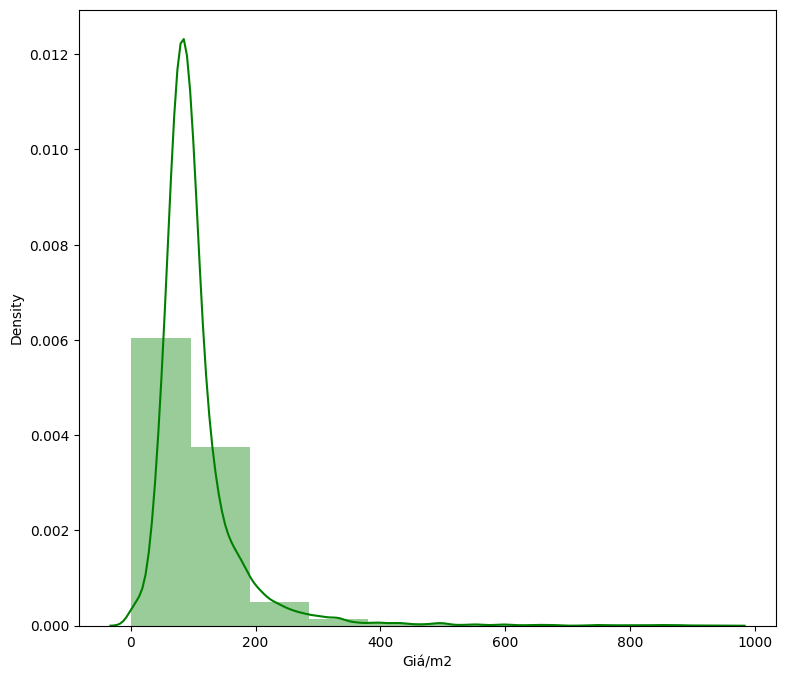

In [ ]:
print(dataset_df['Giá/m2'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['Giá/m2'], color='g', bins=10, hist_kws={'alpha': 0.4});

In [ ]:
list(set(dataset_df.dtypes.tolist()))

[dtype('O'), dtype('float64')]

In [ ]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,So_phong,Dien_tich,Dài,Rộng,Giá/m2
2,4.0,40.0,10.0,4.0,65.00
15,4.0,52.0,12.0,4.2,93.27
24,5.0,90.0,18.0,5.0,108.89
29,3.0,32.0,6.6,4.5,60.94
34,2.0,42.0,11.0,4.0,29.76


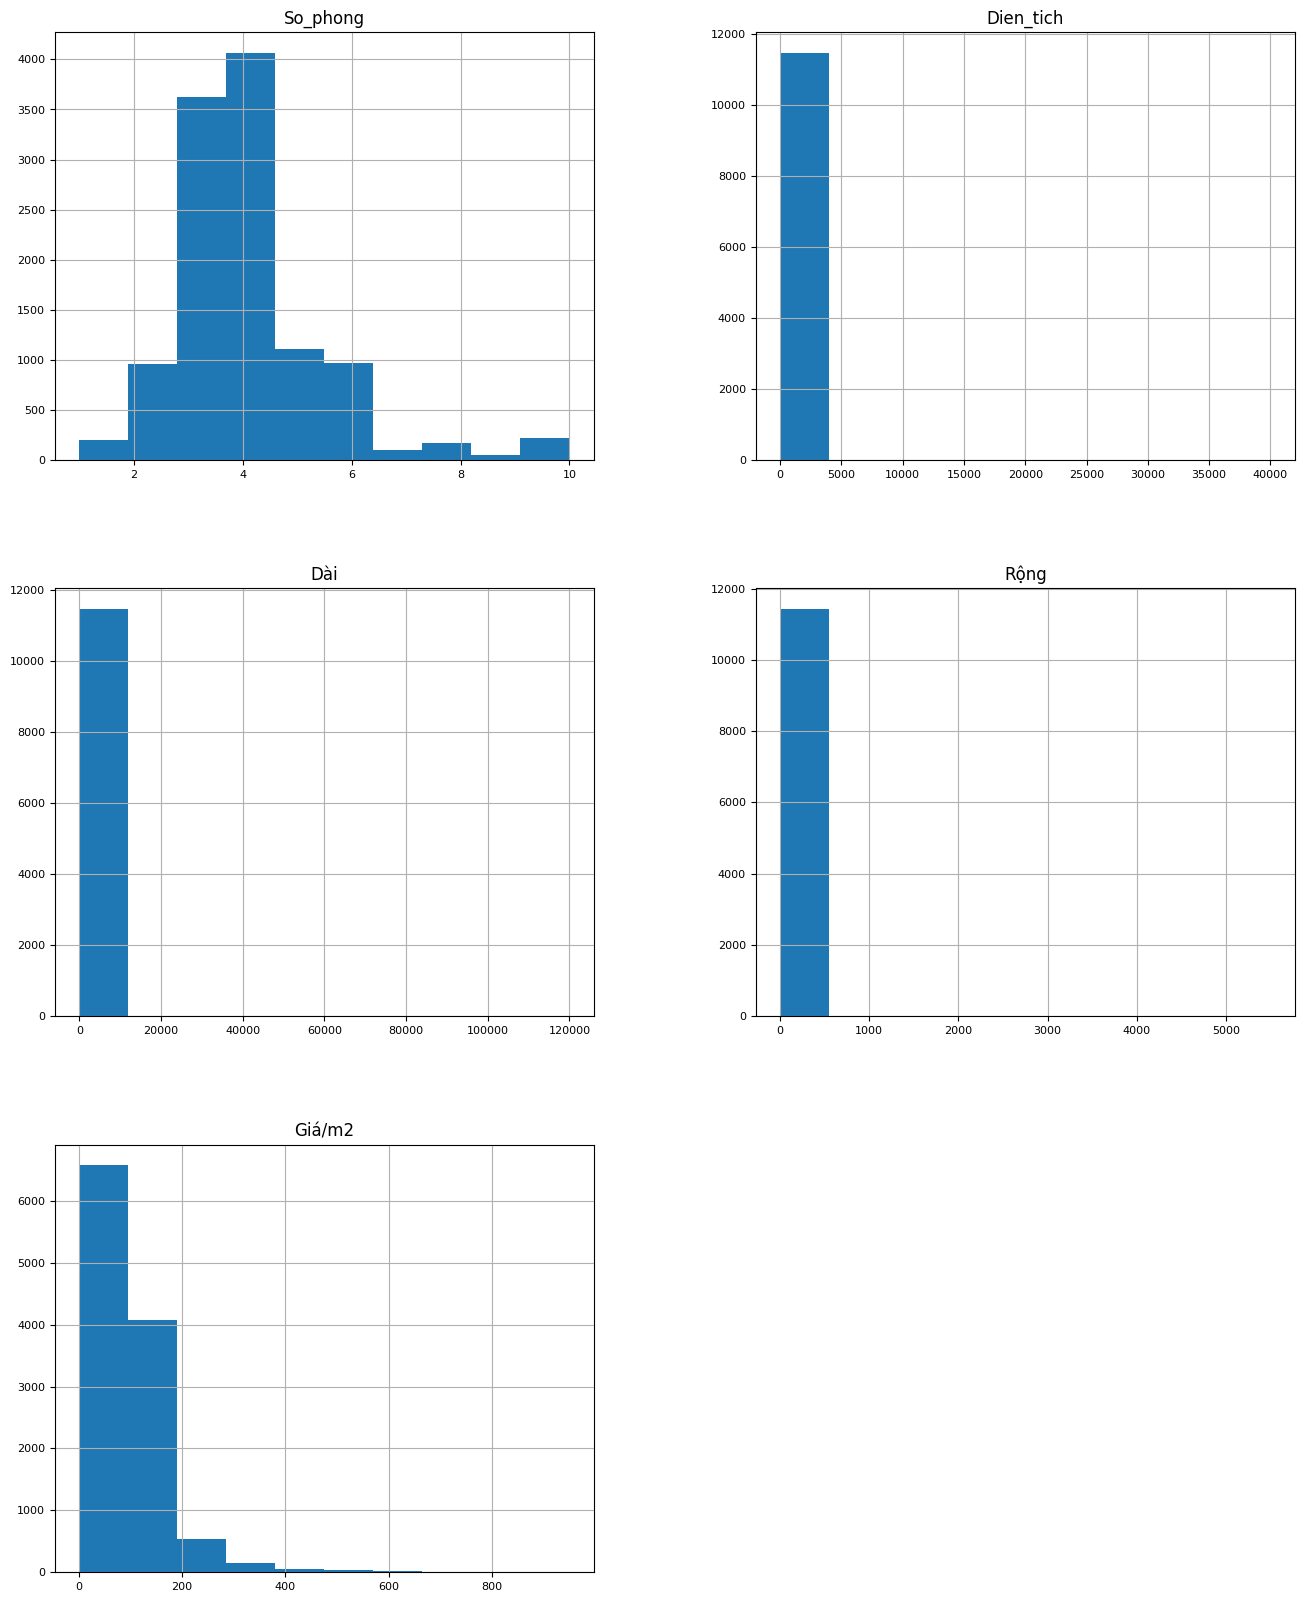

In [ ]:
df_num.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8);

In [ ]:
import numpy as np

def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

9149 examples in training, 2321 examples in testing.


In [ ]:
label = 'Giá/m2'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label='Giá/m2', task = tfdf.keras.Task.REGRESSION, fix_feature_names=False)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label='Giá/m2', task = tfdf.keras.Task.REGRESSION, fix_feature_names=False)

In [ ]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [ ]:
rf = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mae"])

Use /tmp/tmpzm9gmx02 as temporary training directory


In [ ]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.573047. Found 9149 examples.
Training model...


In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

In [ ]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [ ]:
inspector = rf.make_inspector()
inspector.evaluation()

In [ ]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

In [ ]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [ ]:



test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    dataset_df,
    task = tfdf.keras.Task.REGRESSION)



In [ ]:
test_ds

In [ ]:
preds = rf.predict(test_ds)

In [ ]:
sample_submission_df =dataset_df.copy()
sample_submission_df['Giá dự đoán'] = rf.predict(test_ds)


In [ ]:
sample_submission_df.head(200)

In [ ]:
type(sample_submission_df)

In [ ]:
sample_submission_df.to_excel('/content/gdrive/My Drive/Colab Notebooks/sample_submission.xlsx', index=False)
